In [201]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [202]:
def zobrazit_obl(u,x ,t):
    plt.figure(figsize=(10, 6))
    X, T = np.meshgrid(t, x)
    plt.contourf(T, X, u, 20, cmap='jet')
    plt.colorbar(label='u(x,t)')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Numerické řešení vlnové rovnice - Implicitní metoda')
    plt.show()

# Implicitní metoda

Pocatecni podminky

In [203]:
c = 1

x0, xn = 0., 1.
t0, tn = 0. , 2./c 

h = 0.1
tau = 0.01

sigma = (c * tau)/ h
sigma

0.09999999999999999

Okrajove podminky

In [204]:
x = np.arange(x0, xn + h, h)
t = np.arange(t0, tn + tau, tau)

lenx, lent = len(x), len(t)
parametry = [x,t]

u = np.zeros((lenx, lent))
u[:, 0] = 0
u[0, :] = 0.2 * np.sin(np.pi * c * t)
u[-1, :] = 0

Matice A

In [205]:
sub_d = [(-sigma**2)] * (lenx-1)
hl_d = [(1 + 2. * sigma**2)] * lenx

A = np.diag(hl_d) + np.diag(sub_d, -1) + np.diag(sub_d, 1)
A[0, :] = 0
A[-1, :] = 0
A[0, 0] = 1
A[-1, -1] = 1

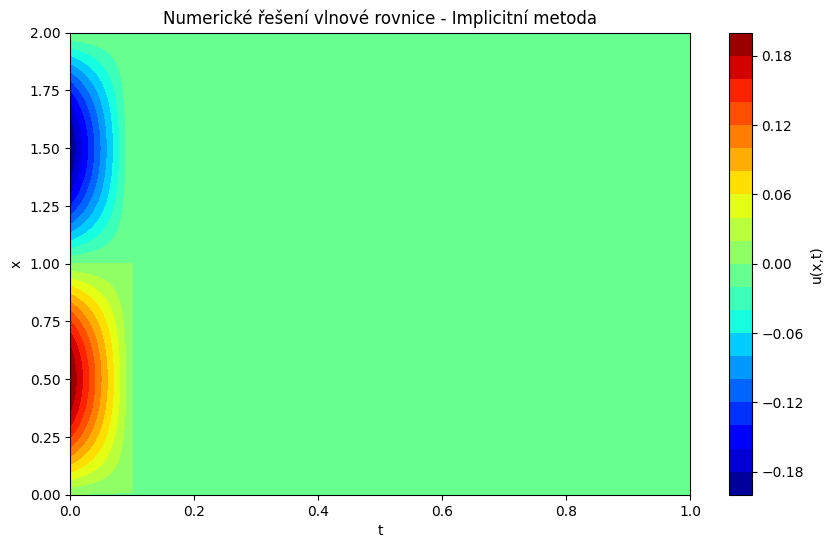

In [206]:
zobrazit_obl(u, *parametry)

In [207]:
for k in range(1,lent-1): #od k >=2
    g = 2* u[:,k] - u[:, k-1]
    g[0] = 0.2 * np.sin(2 * c * t[k+1])
    g[-1] = 0
    u[:, k+1] = np.linalg.solve(A,g)

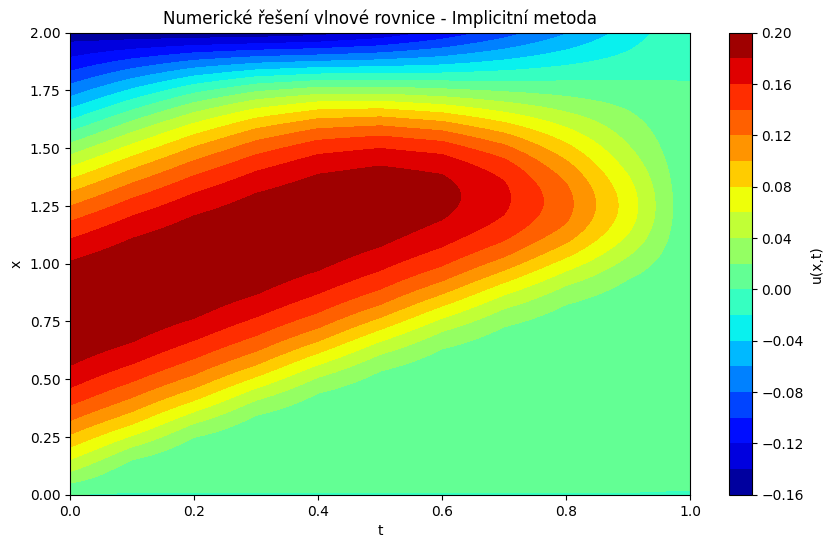

In [208]:
zobrazit_obl(u, *parametry)